I have this data...

In [17]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
db_params = {
    "host": "localhost",  # or "127.0.0.1" if your database is on the local machine
    "port": 5432,         # Default PostgreSQL port
    "database": "Bike_stores",
    "user": "postgres",
    "password": "4823Em15@"
}
conn = psycopg2.connect(**db_params)

Sales and revenue breakdown

In [7]:
query = """
SELECT 
    SUM(quantity * list_price * (1 - discount)) AS total_revenue
FROM order_items;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\636704395.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,total_revenue
0,7.689117e+06


In [9]:
query = """
SELECT 
    s.store_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS revenue
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY s.store_name
ORDER BY revenue DESC;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3783673814.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,store_name,revenue
0,Baldwin Bikes,5.215751e+06
1,Santa Cruz Bikes,1.605823e+06
2,Rowlett Bikes,8.675422e+05


In [10]:
query = """
SELECT 
    p.product_name,
    SUM(oi.quantity) AS total_quantity,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_revenue DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2461237303.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,product_name,total_quantity,total_revenue
0,Trek Slash 8 27.5 - 2016,154,555558.6111
1,Trek Conduit+ - 2016,145,389248.7025
2,Trek Fuel EX 8 29 - 2016,143,368472.7294
3,Surly Straggler 650b - 2016,151,226765.5510
4,Trek Domane SLR 6 Disc - 2017,43,211584.6153
5,Surly Straggler - 2016,147,203507.6200
6,Trek Remedy 29 Carbon Frameset - 2016,125,203380.8701
7,Trek Powerfly 8 FS Plus - 2017,41,188249.6235
8,Trek Madone 9.2 - 2017,39,175899.6482
9,Trek Silque SLR 8 Women's - 2017,29,174524.7315


In [16]:
# By category
category_query = """
SELECT 
    c.category_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_revenue DESC;
"""
category_df = pd.read_sql(category_query, conn)
print(category_df)
# By brand
brand_query = """
SELECT 
    b.brand_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN brands b ON p.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY total_revenue DESC;
"""
brand_df = pd.read_sql(brand_query, conn)
print(brand_df)


         category_name  total_revenue
0       Mountain Bikes   2.715080e+06
1           Road Bikes   1.665098e+06
2    Cruisers Bicycles   9.950326e+05
3       Electric Bikes   9.166848e+05
4  Cyclocross Bicycles   7.110118e+05
5     Comfort Bicycles   3.940201e+05
6    Children Bicycles   2.921892e+05
     brand_name  total_revenue
0          Trek   4.602754e+06
1       Electra   1.205321e+06
2         Surly   9.495071e+05
3  Sun Bicycles   3.419949e+05
4          Haro   1.853846e+05
5        Heller   1.714591e+05
6   Pure Cycles   1.494763e+05
7       Ritchey   7.889895e+04
8       Strider   4.320479e+03


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3935477587.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_df = pd.read_sql(category_query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3935477587.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  brand_df = pd.read_sql(brand_query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3504398774.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_sales = pd.read_sql(query, conn)


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='month'>

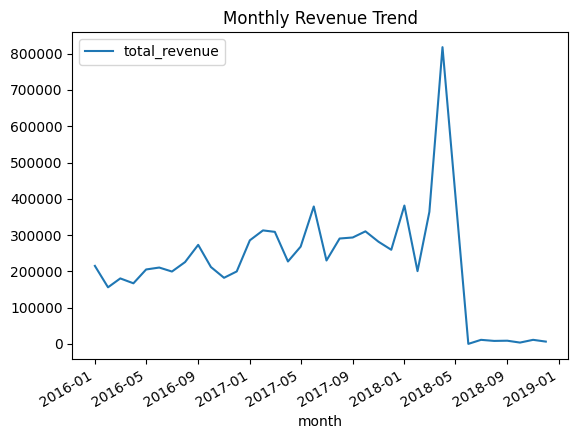

In [13]:
query = """
SELECT 
    DATE_TRUNC('month', order_date) AS month,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql(query, conn)
monthly_sales.plot(x='month', y='total_revenue', kind='line', title='Monthly Revenue Trend')


In [14]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_spent,
    AVG(oi.quantity * oi.list_price * (1 - oi.discount)) AS avg_order_value
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_id, customer_name
ORDER BY total_spent DESC;
"""
pd.read_sql(query, conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3233395354.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,customer_id,customer_name,total_orders,total_spent,avg_order_value
0,94,Sharyn Hopkins,2,34807.9392,3480.793920
1,10,Pamelia Newman,3,33634.2604,3057.660036
2,75,Abby Gamble,2,32803.0062,4686.143743
3,6,Lyndsey Bean,3,32675.0725,2970.461136
4,16,Emmitt Sanchez,3,31925.8857,2660.490475
...,...,...,...,...,...
1440,752,Lloyd Miranda,1,170.9910,170.991000
1441,177,Carissa Foreman,1,170.9910,170.991000
1442,1111,Caroline Jenkins,1,170.9910,170.991000
1443,718,Luciana Mcgee,1,167.9920,167.992000


Customer behavior

In [ ]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_spent
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, customer_name
ORDER BY total_spent DESC
LIMIT 10;
"""
df_top_customers = pd.read_sql_query(query, conn)
df_top_customers


In [ ]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_spent,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, customer_name
ORDER BY avg_order_value DESC
LIMIT 10;
"""
df_avg_order_value = pd.read_sql_query(query, conn)
df_avg_order_value


In [ ]:
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(DISTINCT o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, customer_name
ORDER BY order_count DESC
LIMIT 10;
"""
df_most_orders = pd.read_sql_query(query, conn)
df_most_orders


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2662525549.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_states_activity = pd.read_sql_query(query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\2662525549.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_states_activity, x='state', y='order_count', palette='coolwarm')


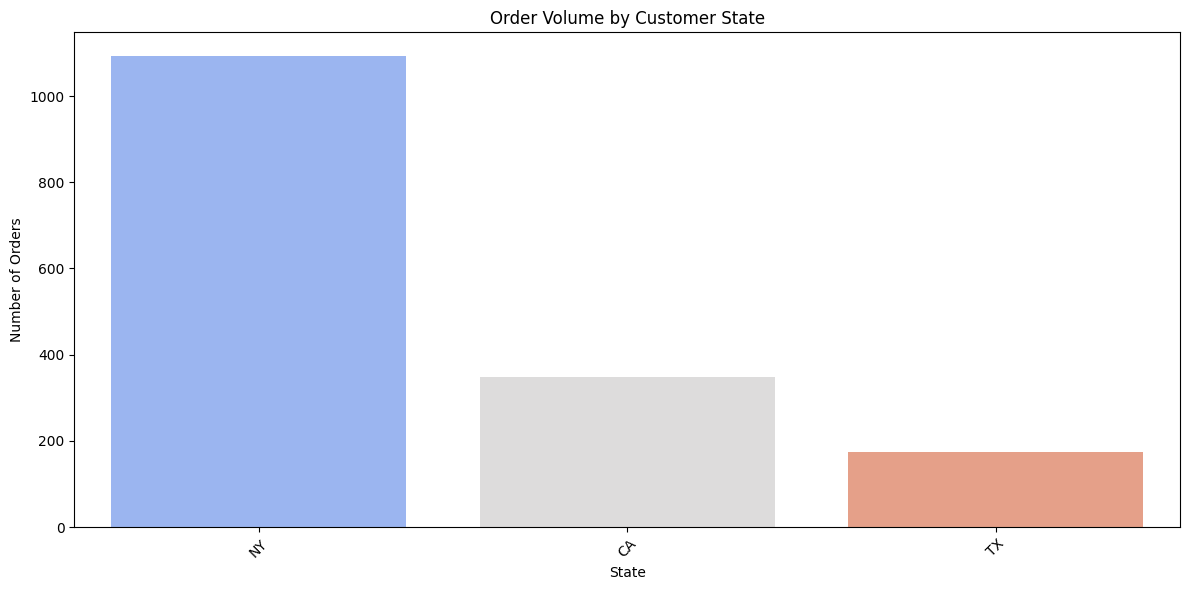

In [18]:
query = """
SELECT 
    c.state,
    COUNT(DISTINCT o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.state
ORDER BY order_count DESC;
"""
df_states_activity = pd.read_sql_query(query, conn)
df_states_activity
# visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df_states_activity, x='state', y='order_count', palette='coolwarm')
plt.title('Order Volume by Customer State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
query = """
SELECT 
    CASE 
        WHEN order_count = 1 THEN 'One-time'
        ELSE 'Repeat'
    END AS customer_type,
    COUNT(*) AS customer_count
FROM (
    SELECT 
        c.customer_id,
        COUNT(DISTINCT o.order_id) AS order_count
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY c.customer_id
) sub
GROUP BY customer_type;
"""
df_repeat_customers = pd.read_sql_query(query, conn)
df_repeat_customers


order management

C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\3068256320.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders_per_month = pd.read_sql_query(query, conn)


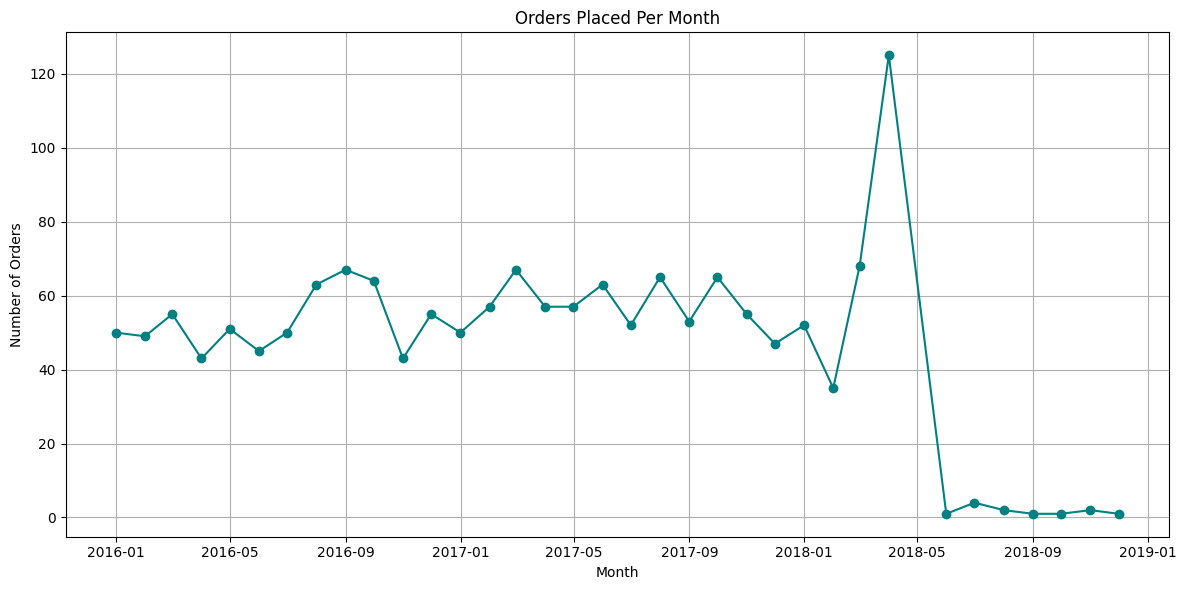

In [20]:
query = """
SELECT 
    DATE_TRUNC('month', order_date) AS month,
    COUNT(*) AS order_count
FROM orders
GROUP BY month
ORDER BY month;
"""
df_orders_per_month = pd.read_sql_query(query, conn)
df_orders_per_month
# visualization
plt.figure(figsize=(12,6))
plt.plot(df_orders_per_month['month'], df_orders_per_month['order_count'], marker='o', color='teal')
plt.title('Orders Placed Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
query = """
SELECT 
    order_status,
    COUNT(*) AS count
FROM orders
GROUP BY order_status
ORDER BY count DESC;
"""
df_status_breakdown = pd.read_sql_query(query, conn)
df_status_breakdown


In [ ]:
query = """
SELECT 
    AVG(shipped_date - order_date) AS avg_shipping_days
FROM orders
WHERE shipped_date IS NOT NULL;
"""
df_avg_shipping = pd.read_sql_query(query, conn)
df_avg_shipping


In [ ]:
query = """
SELECT 
    st.store_id,
    st.store_name,
    COUNT(o.order_id) AS total_orders
FROM stores st
JOIN orders o ON st.store_id = o.store_id
GROUP BY st.store_id, st.store_name
ORDER BY total_orders DESC;
"""
df_top_stores = pd.read_sql_query(query, conn)
df_top_stores


staff performance

staff order process

In [ ]:
query = """
SELECT 
    s.staff_id,
    s.first_name || ' ' || s.last_name AS staff_name,
    COUNT(o.order_id) AS total_orders
FROM staffs s
JOIN orders o ON s.staff_id = o.staff_id
GROUP BY s.staff_id, staff_name
ORDER BY total_orders DESC
LIMIT 10;
"""
df_top_staff = pd.read_sql_query(query, conn)
df_top_staff


In [ ]:
query = """
SELECT 
    st.store_id,
    st.store_name,
    COUNT(sf.staff_id) AS staff_count
FROM stores st
LEFT JOIN staffs sf ON st.store_id = sf.store_id
GROUP BY st.store_id, st.store_name
ORDER BY staff_count DESC;
"""
df_staff_per_store = pd.read_sql_query(query, conn)
df_staff_per_store
# visualization
plt.figure(figsize=(10,6))
plt.bar(df_staff_per_store['store_name'], df_staff_per_store['staff_count'], color='orange')
plt.title('Number of Staff per Store')
plt.xlabel('Store')
plt.ylabel('Staff Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
query = """
SELECT 
    active,
    COUNT(*) AS staff_count
FROM staffs
GROUP BY active;
"""

df_active_status = pd.read_sql_query(query, conn)
df_active_status
df_active_status['status'] = df_active_status['active'].map({True: 'Active', False: 'Inactive'})
df_active_status


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\538886138.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_active_status = pd.read_sql_query(query, conn)


,active,staff_count
0,True,10


📦 Inventory Insights

In [ ]:
query = """
SELECT 
    p.product_id,
    p.product_name,
    SUM(s.quantity) AS total_stock
FROM products p
JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_id, p.product_name
ORDER BY total_stock DESC;
"""
df_total_stock = pd.read_sql_query(query, conn)
df_total_stock.head()


In [ ]:
query = """
SELECT 
    s.product_id,
    p.product_name,
    s.store_id,
    st.store_name,
    s.quantity
FROM stocks s
JOIN (
    SELECT product_id, MAX(quantity) AS max_qty
    FROM stocks
    GROUP BY product_id
) max_stock ON s.product_id = max_stock.product_id AND s.quantity = max_stock.max_qty
JOIN products p ON s.product_id = p.product_id
JOIN stores st ON s.store_id = st.store_id
ORDER BY s.product_id;
"""
df_max_per_product = pd.read_sql_query(query, conn)
df_max_per_product.head()


In [ ]:
query = """
SELECT 
    p.product_id,
    p.product_name
FROM products p
LEFT JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_id, p.product_name
HAVING COALESCE(SUM(s.quantity), 0) = 0;
"""
df_out_of_stock = pd.read_sql_query(query, conn)
df_out_of_stock


In [ ]:
query = """
SELECT 
    p.product_id,
    p.product_name,
    SUM(s.quantity) AS total_stock
FROM products p
JOIN stocks s ON p.product_id = s.product_id
GROUP BY p.product_id, p.product_name
HAVING SUM(s.quantity) < 10
ORDER BY total_stock;
"""
df_low_inventory = pd.read_sql_query(query, conn)
df_low_inventory


In [ ]:
query = """
SELECT 
    st.store_id,
    st.store_name,
    ROUND(SUM(s.quantity * p.list_price), 2) AS inventory_value
FROM stocks s
JOIN stores st ON s.store_id = st.store_id
JOIN products p ON s.product_id = p.product_id
GROUP BY st.store_id, st.store_name
ORDER BY inventory_value DESC;
"""
df_inventory_value = pd.read_sql_query(query, conn)
df_inventory_value
# visualization
plt.figure(figsize=(10,6))
plt.bar(df_inventory_value['store_name'], df_inventory_value['inventory_value'], color='slateblue')
plt.title('Inventory Value per Store')
plt.xlabel('Store')
plt.ylabel('Inventory Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📦 Product Insights

In [31]:
query = """
SELECT 
    p.product_id,
    p.product_name
FROM products p
LEFT JOIN order_items oi ON p.product_id = oi.product_id
WHERE oi.product_id IS NULL;
"""
df_unordered_products = pd.read_sql_query(query, conn)
df_unordered_products


C:\Users\Admin\AppData\Local\Temp\ipykernel_25476\1648786499.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_unordered_products = pd.read_sql_query(query, conn)


,product_id,product_name
0,1,Trek 820 - 2016
1,121,Surly Krampus Frameset - 2018
2,125,Trek Kids' Dual Sport - 2018
3,154,Trek Domane SLR 6 Disc Women's - 2018
4,195,Electra Townie Go! 8i Ladies' - 2018
5,267,Trek Precaliber 12 Girl's - 2018
6,284,Electra Savannah 1 (20-inch) - Girl's - 2018
7,291,Electra Sweet Ride 1 (20-inch) - Girl's - 2018
8,316,Trek Checkpoint ALR 4 Women's - 2019
9,317,Trek Checkpoint ALR 5 - 2019
